# AlexNet

In [ ]:
#Nama:Juan Anemao Sokhi Zidomi
#NIM:1103204007
#Kelas:TK-44-G4

Melakukan Import torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


Melakukan set GPU jika ada

In [ ]:
device=torch.device("cuda"if torch.cuda.is_available() else "cpu")

Membagun Arsitektur Alexnet

In [ ]:
class AlexNetMNIST(nn.Module):
  def __init__(self):
    super(AlexNetMNIST, self).__init__()
    self.features=nn.Sequential(
        nn.Conv2d(1,64 ,kernel_size=11,stride=4,padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(64 ,192 ,kernel_size=5,padding=2),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nn.Conv2d(192 ,384 ,kernel_size=3 ,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256 ,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256,256,kernel_size=3,padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3,stride=2),

    )
    self.avgpool=nn.AdaptiveAvgPool2d((6,6))
    self.classifier=nn.Sequential(
        nn.Dropout(),
        nn.Linear(256*6*6 ,4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096,4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096,10),
  )
  def forward(self ,x):
    x=self.features(x)
    x=self.avgpool(x)
    x=torch.flatten(x,1)
    x=self.classifier(x)
    return x

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


Melakukan inisiasi dataset yaitu data train dan data test

In [ ]:
train_dataset=torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root="./data",train=False ,download=True ,transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 86273487.45it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 101623904.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30581262.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16769831.66it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Melakukan load data train dan data test

In [ ]:
train_loader=DataLoader(dataset=train_dataset ,batch_size=64 ,shuffle=True)
test_loader=DataLoader(dataset=test_dataset ,batch_size= 64 , shuffle=True)

Melakukan inisiasi model

In [ ]:
model = AlexNetMNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Melakukan training model

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")


Epoch 1/5, Loss: 0.3602594553238786
Epoch 2/5, Loss: 0.08049578676414765
Epoch 3/5, Loss: 0.06842717207673597
Epoch 4/5, Loss: 0.05919142944525048
Epoch 5/5, Loss: 0.051712172252699674


Melakukan evaluasi

In [ ]:
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9932


Melakukan pengujian label

Correctly Classified Images:


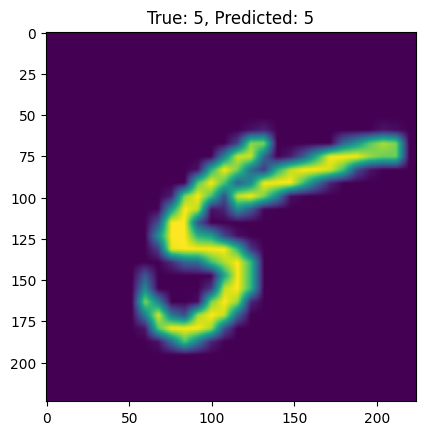

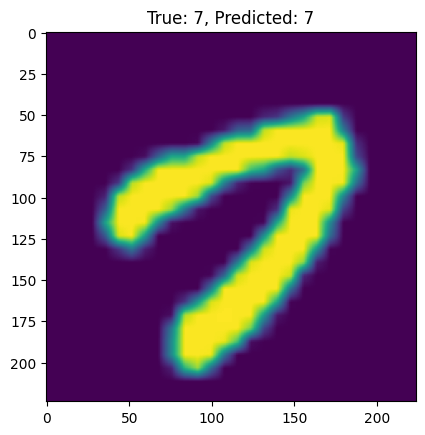

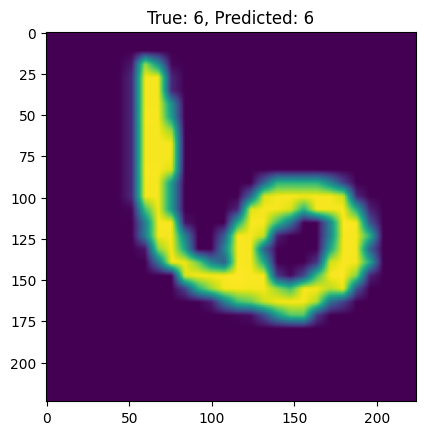

Incorrectly Classified Images:


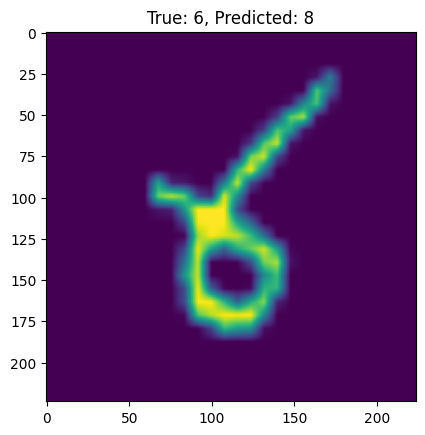

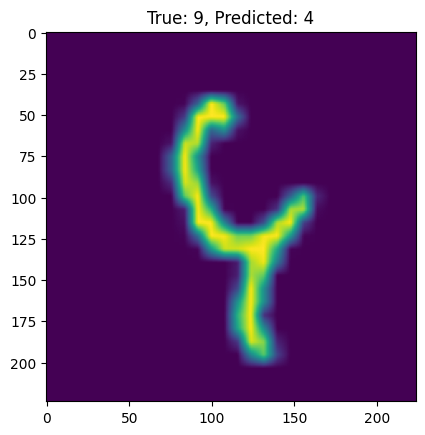

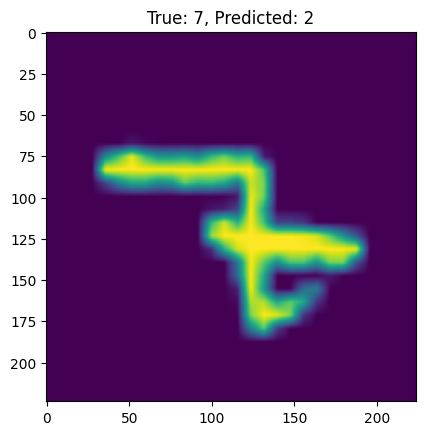

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Use next() to get the next batch

# Make predictions
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Display correct predictions
print("Correctly Classified Images:")
for i in range(3):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Display incorrect predictions
print("Incorrectly Classified Images:")
if incorrect_pred_indices.dim() == 0:  # Check if it's a scalar
    incorrect_pred_indices = incorrect_pred_indices.unsqueeze(0)  # Convert to a 1D tensor

for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i].item()  # Use item() to get the scalar value
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")


